In [1]:
import numpy as np
from skimage import io

import matplotlib.pyplot as plt

In [32]:
cell_im_location = 'Downloads/textile/example_data/ogd_cells.tif'

In [33]:
cell_im = io.imread(cell_im_location)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


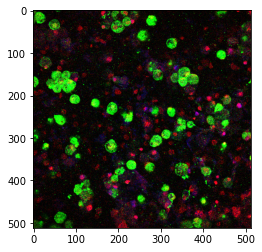

In [34]:
plt.imshow(cell_im)

In [35]:
cell_im.shape

(512, 512, 3)

In [36]:
red_cell_im = cell_im[:,:,0]
green_cell_im = cell_im[:,:,1]
blue_cell_im = cell_im[:,:,2]

In [37]:
import skimage.filters 


skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


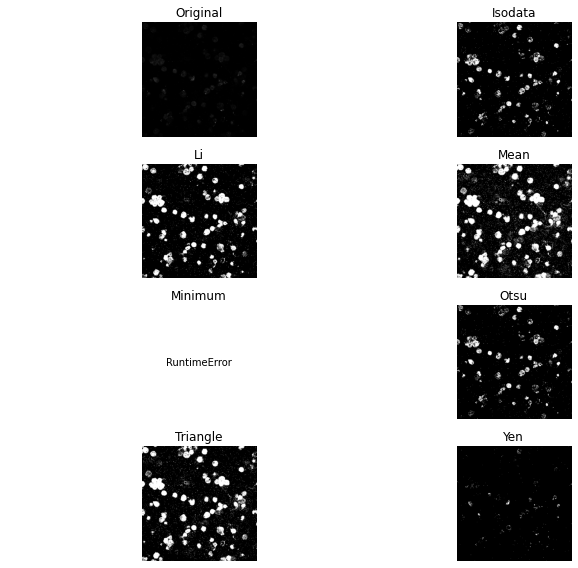

In [38]:
fig, ax = skimage.filters.try_all_threshold(green_cell_im, figsize=(10,8), verbose=True)
plt.show()

In [40]:
thresh_otsu = skimage.filters.threshold_otsu(green_cell_im)
binary_otsu = green_cell_im > thresh_otsu

In [41]:
thresh_otsu

191

In [42]:
binary_otsu

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

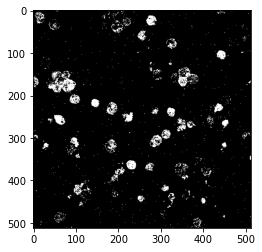

In [43]:
plt.imshow(binary_otsu, cmap='gray')

In [47]:
from skimage import morphology

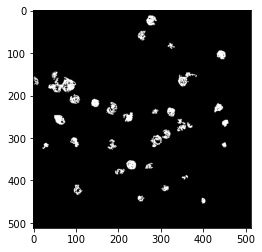

In [51]:
thresh_otsu = skimage.filters.threshold_otsu(green_cell_im)
binary_otsu = green_cell_im > thresh_otsu
#new_binary_otsu = binary_otsu.astype(int)
new_binary_otsu = morphology.remove_small_objects(binary_otsu, min_size = 64)

plt.imshow(new_binary_otsu, cmap = 'gray')

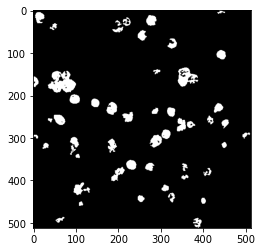

In [60]:
new_green_cell_im = skimage.filters.gaussian(green_cell_im, sigma=1)

#Change input in this line to be new_green_cell_im
thresh_otsu = skimage.filters.threshold_otsu(new_green_cell_im)
binary_otsu = new_green_cell_im > thresh_otsu

new_binary_otsu = morphology.remove_small_objects(binary_otsu, min_size=64)

plt.imshow(new_binary_otsu, cmap = 'gray')

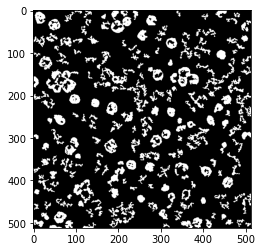

In [63]:
new_green_cell_im = skimage.filters.gaussian(green_cell_im, sigma=1)

#Change input in this line to be new_green_cell_im
thresh_local = skimage.filters.threshold_local(new_green_cell_im, block_size=35)
binary_local = new_green_cell_im > thresh_local

new_binary_local = morphology.remove_small_objects(binary_local, min_size=64)

plt.imshow(new_binary_local, cmap = 'gray')

In [64]:
thresh_local

array([[0.00125556, 0.00125853, 0.00126424, ..., 0.00015262, 0.00015162,
        0.00015112],
       [0.00126082, 0.00126445, 0.00127145, ..., 0.00015305, 0.0001521 ,
        0.00015163],
       [0.00127117, 0.00127607, 0.00128556, ..., 0.00015381, 0.00015296,
        0.00015254],
       ...,
       [0.00082711, 0.00082923, 0.00083342, ..., 0.00010615, 0.00010686,
        0.00010722],
       [0.0008271 , 0.00082916, 0.00083321, ..., 0.00010478, 0.00010549,
        0.00010584],
       [0.00082712, 0.00082915, 0.00083313, ..., 0.00010407, 0.00010477,
        0.00010512]])